In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
netflix = pd.read_csv('/Users/yenhann/Documents/MIT/15.572 Analytics Lab/Datasets/showsWithPrincipalRankings.csv')
ratings = pd.read_csv('/Users/yenhann/Documents/MIT/15.572 Analytics Lab/Datasets/title.ratings.tsv', sep='\t')

df = netflix.merge(ratings, how='left', on='tconst')

#My Wonderful Life Manually added data

df.loc[df['title']=='my wonderful life', 'averageRating'] = 5.9
df.loc[df['title']=='my wonderful life', 'numVotes'] = 714
df.loc[df['title']=='my wonderful life', 'titleType'] = 'movie'
df.loc[df['title']=='my wonderful life', 'runtimeMinutes'] = 99
df.loc[df['title']=='my wonderful life', 'isAdult'] = 0
df.loc[df['title']=='my wonderful life', 'genres'] = 'Comedy,Drama,Romance'

In [6]:
df

,combined_title,release_year,release_date,is_top10,title,season,is_tv_show,tconst,averageRating_x,numVotes_x,...,runtimeMinutes,genres,director_rank,writer_rank,actor_rank,averageRating_y,numVotes_y,averageRating,numVotes,isAdult
0,Titans: Season 3,2021,20210812,True,titans,3.0,True,tt1043813,7.6,98482.0,...,45,"Action,Adventure,Crime",58.0,22.666667,2254.000000,7.6,98482.0,NaN,NaN,NaN
1,Star Trek: Discovery: Season 3,2020,20201015,False,star trek discovery,3.0,True,tt5171438,7.0,122274.0,...,60,"Action,Adventure,Drama",119.0,36.333333,1648.333333,7.0,122274.0,NaN,NaN,NaN
2,Star Trek: Discovery: Season 4,2021,20211118,False,star trek discovery,4.0,True,tt5171438,7.0,122274.0,...,60,"Action,Adventure,Drama",119.0,36.333333,1648.333333,7.0,122274.0,NaN,NaN,NaN
3,Interceptor,2022,20220603,True,interceptor,NaN,False,tt14174940,4.5,22470.0,...,99,"Action,Adventure,Drama",NaN,46.000000,11152.666670,4.5,22470.0,NaN,NaN,NaN
4,Jurassic World Camp Cretaceous: Season 1,2020,20200918,True,jurassic world camp cretaceous,1.0,True,tt10436228,7.5,8798.0,...,24,"Action,Adventure,Animation",1766.0,55.000000,1541.000000,7.5,8798.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,Yuri Marçal: Honest Mistake,2022,20220602,False,yuri marçal honest mistake,NaN,False,tt20597344,6.5,46.0,...,59,"Comedy,Documentary",71245.5,NaN,168717.000000,6.5,46.0,NaN,NaN,NaN
2222,Zero to Hero,2021,20211105,True,zero to hero,NaN,False,tt14892216,6.7,925.0,...,102,"Biography,Drama,Sport",55914.5,NaN,19532.166670,6.7,925.0,NaN,NaN,NaN
2223,"ariana grande: excuse me, i love you",2020,20201221,False,ariana grande excuse me i love you,NaN,False,tt13615386,6.3,2648.0,...,97,"Documentary,Music",5695.0,NaN,47846.666670,6.3,2648.0,NaN,NaN,NaN
2224,jeen-yuhs: A Kanye Trilogy,2022,20220216,True,jeenyuhs a kanye trilogy,1.0,True,tt14599438,8.0,9043.0,...,90,"Documentary,Music",17577.5,NaN,20629.166670,8.0,9043.0,NaN,NaN,NaN


In [7]:
df['is_top10'] = df['is_top10'].astype(int)
df.replace('\\N', np.nan, inplace=True)
movies, tv_shows = df[df['is_tv_show']==False], df[df['is_tv_show']==True]

# Movies

## Data Preparation

In [8]:
# drop columns that are not needed
movies = movies.drop(['tconst', 'release_date','combined_title', 'title', 'season', 'is_tv_show', 'isAdult','averageRating_y','numVotes_y','averageRating','numVotes'], axis = 1)

In [9]:
movies.rename(columns = {'averageRating_x':'averageRating', 'numVotes_x':'numVotes'}, inplace = True)
movies

,release_year,is_top10,averageRating,numVotes,titleType,runtimeMinutes,genres,director_rank,writer_rank,actor_rank
3,2022,1,4.5,22470.0,movie,99,"Action,Adventure,Drama",NaN,46.0,11152.666670
19,2021,1,7.2,526805.0,movie,138,"Comedy,Drama,Sci-Fi",252.0,109.0,35.333333
20,2020,1,7.7,175887.0,movie,129,"Drama,History,Thriller",1772.0,157.0,746.666667
21,2022,1,6.7,26486.0,movie,97,"Comedy,Music",2766.0,163.0,92465.166670
22,2021,1,5.6,40731.0,movie,109,"Action,Adventure,Thriller",2529.0,213.0,2102.000000
...,...,...,...,...,...,...,...,...,...,...
2212,2021,1,7.2,26734.0,movie,98,"Adventure,Animation,Comedy",NaN,NaN,3178.000000
2219,2021,1,5.4,339.0,short,25,"Adventure,Short",18562.5,NaN,13183.500000
2221,2022,0,6.5,46.0,tvSpecial,59,"Comedy,Documentary",71245.5,NaN,168717.000000
2222,2021,1,6.7,925.0,movie,102,"Biography,Drama,Sport",55914.5,NaN,19532.166670


In [10]:
movies.isna().sum()

release_year        0
is_top10            0
averageRating       4
numVotes            4
titleType           0
runtimeMinutes      5
genres              0
director_rank      77
writer_rank       188
actor_rank         48
dtype: int64

In [11]:
movies.titleType.value_counts()

movie        742
tvSpecial    130
short         46
Name: titleType, dtype: int64

### Impute averageRating, numVotes, runtimeMinutes, director_rank, writer_rank, actor_rank with Mean

In [12]:
from sklearn.model_selection import train_test_split
movies_train, movies_test = train_test_split(movies, test_size=0.3, random_state=100)

# Training set
movies_train_X = movies_train.drop(['is_top10'], axis = 1)
movies_train_Y = movies_train['is_top10']

# Test set
movies_test_X = movies_test.drop(['is_top10'], axis = 1)
movies_test_Y = movies_test['is_top10']

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
transformer = ColumnTransformer(
    [("onehot",OneHotEncoder(drop='first', handle_unknown='ignore'), ['titleType']),                # One hot encode title types
    ("imputer", SimpleImputer(strategy='mean'), ['averageRating', 'numVotes', 'runtimeMinutes','director_rank','writer_rank','actor_rank']),   # Impute missing ratings, votes, and runtime with the average
    ("bagofw", CountVectorizer(), 'genres')                                                         # Splits genres into bag of words and encode them
    ],
    remainder='passthrough')

### Model 1 : Decision Tree

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
import sklearn.preprocessing
import sklearn.linear_model

# make sklearn pipeline with transform, normalization, and model (CART)
pipeTree = Pipeline(
    steps=[
        ('transformer', transformer),                                                       # Transform dataset                
        # ('normalizer', sklearn.preprocessing.Normalizer()),                                 # Normalise features
        # ('standardizer', sklearn.preprocessing.StandardScaler(with_mean=False)),            # Rescale dataset
        ('decisiontree', sklearn.tree.DecisionTreeClassifier())                             # Build Decision Tree model
    ]
)    

In [16]:
# use grid search to cross validate tree model - 5-fold cross validation
from sklearn.model_selection import GridSearchCV

gsTree = GridSearchCV(
    pipeTree,
    param_grid={
        'decisiontree__max_depth': [5, 6, 7, 8, 9, 10],
        'decisiontree__min_samples_leaf': [1, 5, 10, 15, 20],
        'decisiontree__criterion': ['gini', 'entropy', 'log_loss'],
    },
    scoring={"AUC": "roc_auc", "Accuracy": "accuracy"},
    refit="AUC",
    cv=5,
    verbose=0,
    n_jobs=-1,
)

In [17]:
gsTree.fit(movies_train_X, movies_train_Y)

/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['titleType']),
                                                                        ('imputer',
                                                                         SimpleImputer(),
                                                                         ['averageRating',
                                                                          'numVotes',
                                                                          'runtimeMinutes',
              

In [18]:
# retrieve the best parameters and estimators returned by the grid search cross validation step
gsTree.best_params_
gsTree.best_score_
best_decisiontree = gsTree.best_estimator_

Accuracy:  0.7028985507246377
AUC:  0.7351107118321618


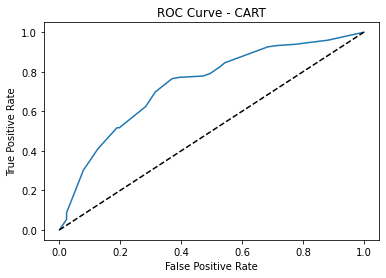

In [19]:
best_decisiontree.fit(movies_train_X, movies_train_Y)

from sklearn.metrics import roc_auc_score, accuracy_score

y_prob_pred = best_decisiontree.predict_proba(movies_test_X)[:,1]
y_pred = best_decisiontree.predict(movies_test_X)

print("Accuracy: ", accuracy_score(movies_test_Y, y_pred))
print("AUC: ", roc_auc_score(movies_test_Y, y_prob_pred))

#plot auc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(movies_test_Y, y_prob_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CART')
plt.show()

AUCPR:  0.7431411670205801


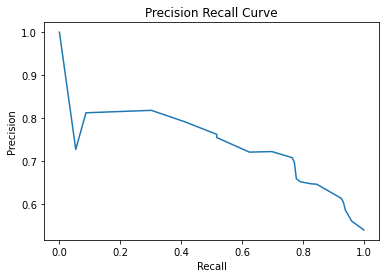

F1 Score:  0.7354838709677419


In [20]:
#calculate precision recall
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(movies_test_Y, y_prob_pred)

#auc of precision recall curve
from sklearn.metrics import auc

print("AUCPR: ", auc(recall, precision))

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

#calculate f1 score
from sklearn.metrics import f1_score

print("F1 Score: ", f1_score(movies_test_Y, y_pred))

### Model 2 : Random Forest

In [27]:
# make sklearn pipeline with transform, normalization, and model (RF)
from sklearn.ensemble import RandomForestClassifier

pipeRF = Pipeline(
    steps=[
        ('transformer', transformer),                                                       # Transform dataset                
        #('normalizer', sklearn.preprocessing.Normalizer()),                                 # Normalise features
        #('standardizer', sklearn.preprocessing.StandardScaler(with_mean=False)),            # Rescale dataset
        ('randomforest', sklearn.ensemble.RandomForestClassifier())                             # Build Decision Tree model
    ]
)    

In [28]:
gsRF = GridSearchCV(
    pipeRF,
    param_grid={
        'randomforest__n_estimators': [100, 250, 500],
        'randomforest__max_depth': [5, 10, 15, 20, 25, 30],
        'randomforest__min_samples_leaf': [1, 5, 10, 15, 20],
        'randomforest__criterion': ['gini', 'entropy', 'log_loss'],
    },
    scoring={"AUC": "roc_auc", "Accuracy": "accuracy"},
    refit="AUC",
    cv=5,
    verbose=0,
    n_jobs=-1,
)

In [29]:
gsRF.fit(movies_train_X, movies_train_Y)

/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['titleType']),
                                                                        ('imputer',
                                                                         SimpleImputer(),
                                                                         ['averageRating',
                                                                          'numVotes',
                                                                          'runtimeMinutes',
              

In [30]:
# retrieve the best parameters and estimators returned by the grid search cross validation step
gsRF.best_params_
gsRF.best_score_
best_randomforest = gsRF.best_estimator_

Accuracy:  0.7246376811594203
AUC:  0.7667388891824765


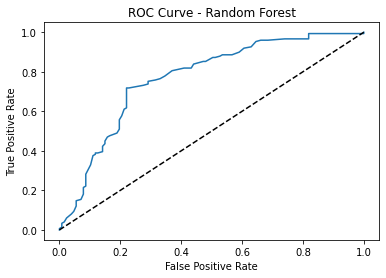

In [31]:
best_randomforest.fit(movies_train_X, movies_train_Y)

from sklearn.metrics import roc_auc_score, accuracy_score

y_prob_pred = best_randomforest.predict_proba(movies_test_X)[:,1]
y_pred = best_randomforest.predict(movies_test_X)

print("Accuracy: ", accuracy_score(movies_test_Y, y_pred))
print("AUC: ", roc_auc_score(movies_test_Y, y_prob_pred))

#plot auc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(movies_test_Y, y_prob_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.show()

AUCPR:  0.7412608411782835


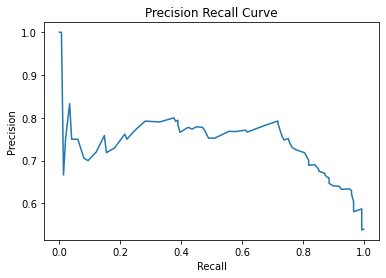

F1 Score:  0.7432432432432433


In [32]:
#calculate precision recall
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(movies_test_Y, y_prob_pred)

#auc of precision recall curve
from sklearn.metrics import auc

print("AUCPR: ", auc(recall, precision))

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

#calculate f1 score
from sklearn.metrics import f1_score

print("F1 Score: ", f1_score(movies_test_Y, y_pred))

### Model 3 : Feed Forward Neural Network

In [45]:
# make sklearn pipeline with transform, normalization, and model (RF)
from sklearn.neural_network import MLPClassifier

pipeMLP = Pipeline(
    steps=[
        ('transformer', transformer),                                                       # Transform dataset                
        ('normalizer', sklearn.preprocessing.Normalizer()),                                 # Normalise features
        ('standardizer', sklearn.preprocessing.StandardScaler(with_mean=False)),            # Rescale dataset
        ('neuralnetwork', sklearn.neural_network.MLPClassifier())                           # Build Neural Network
    ]
)    

In [52]:
gsMLP = GridSearchCV(
    pipeMLP,
    param_grid={
        'neuralnetwork__hidden_layer_sizes': [50, 100, 150, 200],
        'neuralnetwork__activation': ['relu','tanh','logistic'],
        'neuralnetwork__learning_rate': ['constant','adaptive'],
    },
    scoring={"AUC": "roc_auc", "Accuracy": "accuracy"},
    refit="AUC",
    cv=5,
    verbose=0,
    n_jobs=-1,
)

In [53]:
gsMLP.fit(movies_train_X, movies_train_Y)

/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yenhann/o

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['titleType']),
                                                                        ('imputer',
                                                                         SimpleImputer(),
                                                                         ['averageRating',
                                                                          'numVotes',
                                                                          'runtimeMinutes',
              

In [54]:
# retrieve the best parameters and estimators returned by the grid search cross validation step
gsMLP.best_params_
gsMLP.best_score_
best_neuralnet = gsMLP.best_estimator_

Accuracy:  0.6340579710144928
AUC:  0.6748401416265919


/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


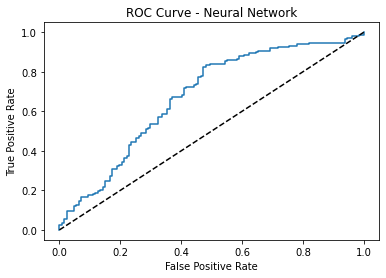

In [55]:
best_neuralnet.fit(movies_train_X, movies_train_Y)

from sklearn.metrics import roc_auc_score, accuracy_score

y_prob_pred = best_neuralnet.predict_proba(movies_test_X)[:,1]
y_pred = best_neuralnet.predict(movies_test_X)

print("Accuracy: ", accuracy_score(movies_test_Y, y_pred))
print("AUC: ", roc_auc_score(movies_test_Y, y_prob_pred))

#plot auc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(movies_test_Y, y_prob_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.show()

AUCPR:  0.6744973500314193


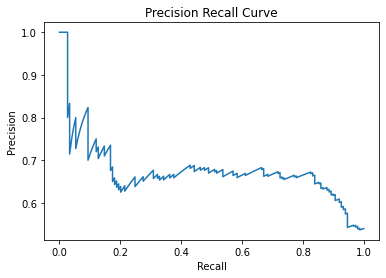

F1 Score:  0.6505190311418685


In [56]:
#calculate precision recall
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(movies_test_Y, y_prob_pred)

#auc of precision recall curve
from sklearn.metrics import auc

print("AUCPR: ", auc(recall, precision))

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

#calculate f1 score
from sklearn.metrics import f1_score

print("F1 Score: ", f1_score(movies_test_Y, y_pred))

In [57]:
gsMLP.best_params_

{'neuralnetwork__activation': 'tanh',
 'neuralnetwork__hidden_layer_sizes': 150,
 'neuralnetwork__learning_rate': 'constant'}

# TV Shows

### Data Preparation

In [68]:
tv_shows = df[df['is_tv_show']==True]

In [69]:
# data prepration
# manually impute season 2806
tv_shows.loc[tv_shows['season'] == 2806, 'season'] = 1

In [70]:
# manually impute season 24
tv_shows.loc[tv_shows['season'] == 24, 'season'] = 1

In [71]:
tv_shows.season.value_counts()

1.0     828
2.0     226
3.0     109
4.0      67
5.0      38
6.0      18
7.0       4
12.0      3
8.0       2
14.0      2
13.0      2
10.0      1
9.0       1
20.0      1
17.0      1
16.0      1
15.0      1
19.0      1
18.0      1
11.0      1
Name: season, dtype: int64

In [72]:
tv_shows = tv_shows[['release_year','is_top10','season','averageRating_x', 'numVotes_x','titleType','runtimeMinutes','genres','director_rank','writer_rank','actor_rank']]
tv_shows

,release_year,is_top10,season,averageRating_x,numVotes_x,titleType,runtimeMinutes,genres,director_rank,writer_rank,actor_rank
0,2021,1,3.0,7.6,98482.0,tvSeries,45,"Action,Adventure,Crime",58.0,22.666667,2254.000000
1,2020,0,3.0,7.0,122274.0,tvSeries,60,"Action,Adventure,Drama",119.0,36.333333,1648.333333
2,2021,0,4.0,7.0,122274.0,tvSeries,60,"Action,Adventure,Drama",119.0,36.333333,1648.333333
4,2020,1,1.0,7.5,8798.0,tvSeries,24,"Action,Adventure,Animation",1766.0,55.000000,1541.000000
5,2021,1,2.0,7.5,8798.0,tvSeries,24,"Action,Adventure,Animation",1766.0,55.000000,1541.000000
...,...,...,...,...,...,...,...,...,...,...,...
2217,2022,1,1.0,7.1,7911.0,tvMiniSeries,236,"Crime,Documentary,Drama",53174.5,NaN,228179.000000
2218,2021,1,1.0,7.4,642.0,tvSeries,70,"Drama,Romance,Thriller",14223.0,NaN,27333.000000
2220,2022,1,1.0,4.7,438.0,tvSeries,45,Reality-TV,NaN,NaN,371796.000000
2224,2022,1,1.0,8.0,9043.0,tvMiniSeries,90,"Documentary,Music",17577.5,NaN,20629.166670


In [73]:
tv_shows = tv_shows.rename(columns = {'averageRating_x': 'averageRating', 'numVotes_x': 'numVotes'})

In [75]:
tv_shows.isna().sum()

release_year        0
is_top10            0
season              0
averageRating       3
numVotes            3
titleType           0
runtimeMinutes    266
genres              0
director_rank     164
writer_rank       314
actor_rank         54
dtype: int64

### Model 1 : Decision Tree (CART)

In [76]:
from sklearn.model_selection import train_test_split
tvShows_train, tvShows_test = train_test_split(tv_shows, test_size=0.3, random_state=100)

# Training set
tvShows_train_X = tvShows_train.drop(['is_top10'], axis = 1)
tvShows_train_Y = tvShows_train['is_top10']

# Test set
tvShows_test_X = tvShows_test.drop(['is_top10'], axis = 1)
tvShows_test_Y = tvShows_test['is_top10']

In [77]:
gsTree.fit(tvShows_train_X, tvShows_train_Y)

/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 937, in fit
    s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['titleType']),
                                                                        ('imputer',
                                                                         SimpleImputer(),
                                                                         ['averageRating',
                                                                          'numVotes',
                                                                          'runtimeMinutes',
              

In [78]:
# retrieve the best parameters and estimators returned by the grid search cross validation step
gsTree.best_params_
gsTree.best_score_
best_decisiontree = gsTree.best_estimator_

Accuracy:  0.6921119592875318
AUC:  0.6612903225806452


/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


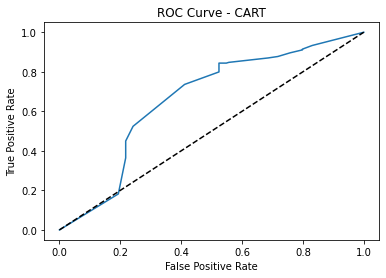

In [79]:
best_decisiontree.fit(tvShows_train_X, tvShows_train_Y)

from sklearn.metrics import roc_auc_score, accuracy_score

y_prob_pred = best_decisiontree.predict_proba(tvShows_test_X)[:,1]
y_pred = best_decisiontree.predict(tvShows_test_X)

print("Accuracy: ", accuracy_score(tvShows_test_Y, y_pred))
print("AUC: ", roc_auc_score(tvShows_test_Y, y_prob_pred))

#plot auc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(tvShows_test_Y, y_prob_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CART')
plt.show()

AUCPR:  0.7813243182814842


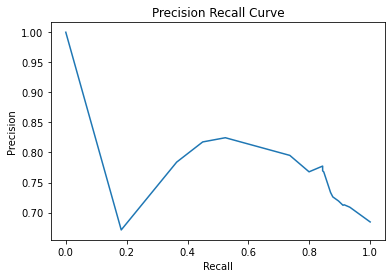

F1 Score:  0.7952622673434855


In [80]:
#calculate precision recall
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(tvShows_test_Y, y_prob_pred)

#auc of precision recall curve
from sklearn.metrics import auc

print("AUCPR: ", auc(recall, precision))

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

#calculate f1 score
from sklearn.metrics import f1_score

print("F1 Score: ", f1_score(tvShows_test_Y, y_pred))

### Model 2 : Random Forest

In [81]:
gsRF.fit(tvShows_test_X, tvShows_test_Y)

/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/s

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['titleType']),
                                                                        ('imputer',
                                                                         SimpleImputer(),
                                                                         ['averageRating',
                                                                          'numVotes',
                                                                          'runtimeMinutes',
              

In [82]:
# retrieve the best parameters and estimators returned by the grid search cross validation step
gsRF.best_params_
gsRF.best_score_
best_RF = gsRF.best_estimator_

Accuracy:  0.7557251908396947
AUC:  0.8270775872406765


/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


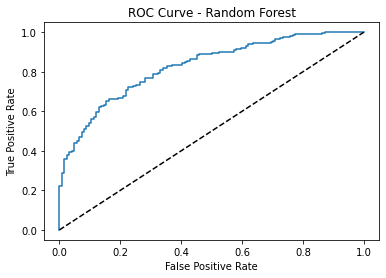

In [83]:
best_RF.fit(tvShows_train_X, tvShows_train_Y)

from sklearn.metrics import roc_auc_score, accuracy_score

y_prob_pred = best_RF.predict_proba(tvShows_test_X)[:,1]
y_pred = best_RF.predict(tvShows_test_X)

print("Accuracy: ", accuracy_score(tvShows_test_Y, y_pred))
print("AUC: ", roc_auc_score(tvShows_test_Y, y_prob_pred))

#plot auc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(tvShows_test_Y, y_prob_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.show()

AUCPR:  0.914489589255072


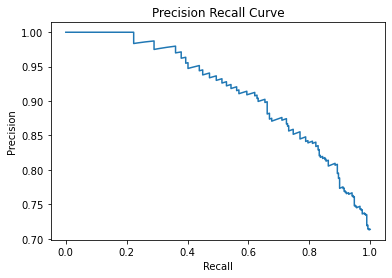

F1 Score:  0.8372881355932204


In [84]:
#calculate precision recall
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(tvShows_test_Y, y_prob_pred)

#auc of precision recall curve
from sklearn.metrics import auc

print("AUCPR: ", auc(recall, precision))

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

#calculate f1 score
from sklearn.metrics import f1_score

print("F1 Score: ", f1_score(tvShows_test_Y, y_pred))

### Model 3 : Neural Network

In [85]:
gsMLP.fit(tvShows_train_X, tvShows_train_Y)

/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yenhann/o

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['titleType']),
                                                                        ('imputer',
                                                                         SimpleImputer(),
                                                                         ['averageRating',
                                                                          'numVotes',
                                                                          'runtimeMinutes',
              

In [86]:
# retrieve the best parameters and estimators returned by the grid search cross validation step
gsMLP.best_params_
gsMLP.best_score_
best_MLP = gsMLP.best_estimator_

Accuracy:  0.7480916030534351
AUC:  0.7501498980693129


/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/yenhann/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


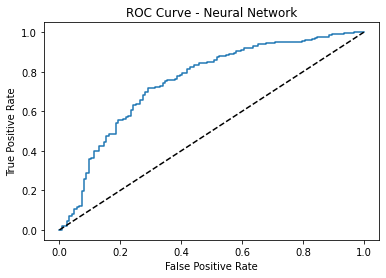

In [87]:
best_MLP.fit(tvShows_train_X, tvShows_train_Y)

from sklearn.metrics import roc_auc_score, accuracy_score

y_prob_pred = best_MLP.predict_proba(tvShows_test_X)[:,1]
y_pred = best_MLP.predict(tvShows_test_X)

print("Accuracy: ", accuracy_score(tvShows_test_Y, y_pred))
print("AUC: ", roc_auc_score(tvShows_test_Y, y_prob_pred))

#plot auc curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(tvShows_test_Y, y_prob_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.show()

AUCPR:  0.8226181782521528


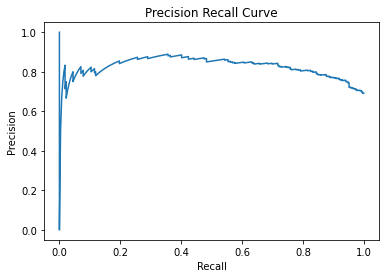

F1 Score:  0.8307692307692308


In [88]:
#calculate precision recall
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(tvShows_test_Y, y_prob_pred)

#auc of precision recall curve
from sklearn.metrics import auc

print("AUCPR: ", auc(recall, precision))

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

#calculate f1 score
from sklearn.metrics import f1_score

print("F1 Score: ", f1_score(tvShows_test_Y, y_pred))

In [90]:
gsMLP.best_params_

{'neuralnetwork__activation': 'relu',
 'neuralnetwork__hidden_layer_sizes': 100,
 'neuralnetwork__learning_rate': 'constant'}